In [1]:
using HypothesisTests, Distributions, Gadfly

In [2]:
X = Normal(60, 1)
OneSampleTTest(rand(X, 10), 61)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         61
    point estimate:          59.48120653908163
    95% confidence interval: (58.661216051568495,60.30119702659477)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0023411622883026573 (very significant)

Details:
    number of observations:   10
    t-statistic:              -4.189987028809889
    degrees of freedom:       9
    empirical standard error: 0.36248166175105334


In [3]:
function rejections(X, n, q, h₀)
    r = 0
    for i = 1:n
        interval = ci(OneSampleTTest(rand(X, q), h₀))
        if (!(h₀ >= interval[1] && h₀ <= interval[2]))
            r = r + 1
        end
    end
    r
end

rejections (generic function with 1 method)

In [4]:
rejections(Normal(60, 1), 1000, 10, 61)

806

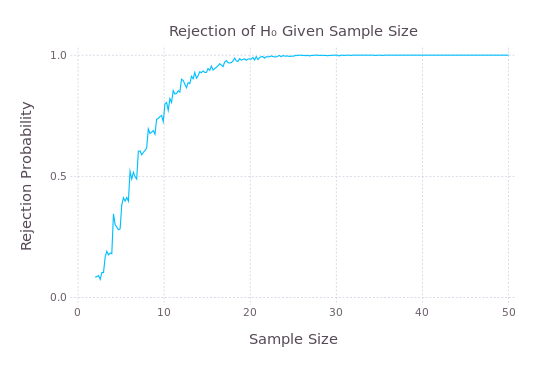

In [5]:
samplesize = plot(x -> rejections(Normal(60, 1), 1000, convert(Int, floor(x)), 61) / 1000, 
2, 50, 
Guide.xlabel("Sample Size"), 
Guide.ylabel("Rejection Probability"), 
Guide.title("Rejection of H₀ Given Sample Size"),
Guide.xticks(ticks = [1])) 

In [19]:
draw(PNG("samplesize.png", 5inch, 3inch), samplesize)

LoadError: syntax: keyword argument is not a symbol: "fill"
while loading In[19], in expression starting on line 1

In [20]:
?PNG

INFO: Loading help data...


DataType   : Image{PNGBackend} (constructor with 8 methods)
  supertype: Backend
  fields   : (:out,:surface,:ctx,:width,:height,:stroke,:fill,:fill_opacity,:stroke_opacity,:stroke_dash,:stroke_linecap,:stroke_linejoin,:visible,:state_stack,:property_stack,:vector_properties,:owns_surface,:ownedfile,:filename,:finished,:emit_on_finish,:ppmm)


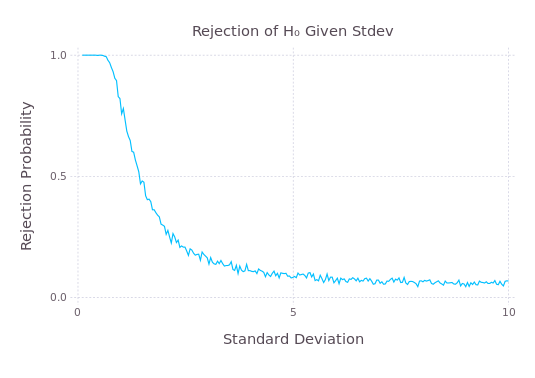

In [12]:
stdev = plot(x -> rejections(Normal(60, x), 1000, 10, 61) / 1000, .1, 10,
Guide.xlabel("Standard Deviation"), Guide.ylabel("Rejection Probability"), Guide.title("Rejection of H₀ Given Stdev"))

In [14]:
draw(PNG("stdev.png", 5inch, 3inch), stdev)

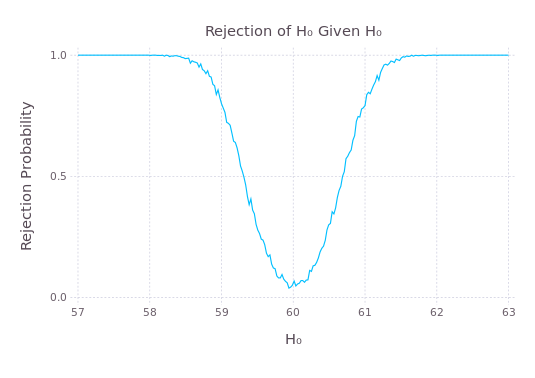

In [15]:
nullhyp = plot(x -> rejections(Normal(60, 1), 1000, 10, x) / 1000, 57, 63,
Guide.xlabel("H₀"), Guide.ylabel("Rejection Probability"), Guide.title("Rejection of H₀ Given H₀"))

In [16]:
draw(PNG("nullhyp.png", 5inch, 3inch), nullhyp)